In [1]:
# 📦 Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


In [2]:
# 📥 Load your dataset
path = "/Users/lakshgupta/Desktop/team b /parkinsons_updrs.csv"
df = pd.read_csv(path)

# 🧠 Create binary target based on motor_UPDRS median
df['status'] = (df['motor_UPDRS'] > df['motor_UPDRS'].median()).astype(int)

# 🎯 Feature and target split
X = df.drop(columns=['subject#', 'motor_UPDRS', 'total_UPDRS', 'status'])
y = df['status']

# 📚 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ⚖️ Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
# ✅ Define the 5 specific models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Naive Bayes': GaussianNB(),
    'Neural Network (MLPClassifier)': MLPClassifier(max_iter=1000)
}


K-Nearest Neighbors:
  Accuracy: 0.8757
  Precision: 0.8720
  Recall: 0.8780
  F1 Score: 0.8750
  ROC AUC: 0.9504
----------------------------------------


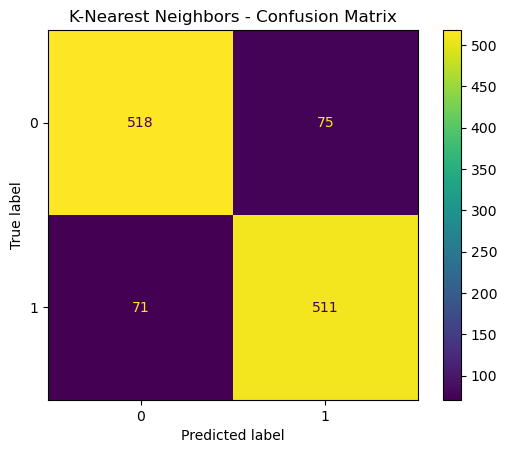

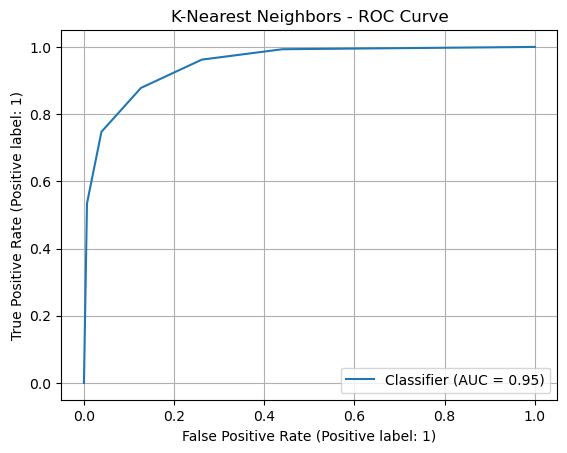

Gradient Boosting:
  Accuracy: 0.9157
  Precision: 0.9142
  Recall: 0.9158
  F1 Score: 0.9150
  ROC AUC: 0.9746
----------------------------------------


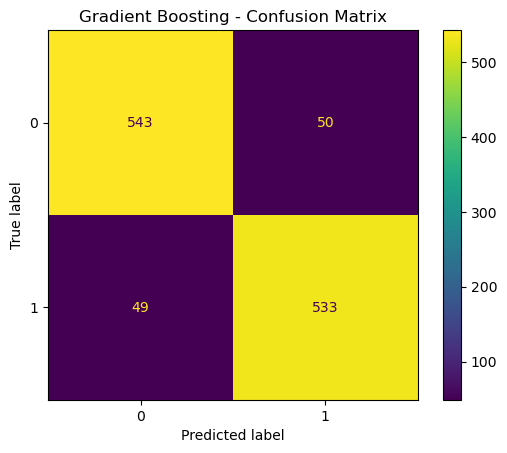

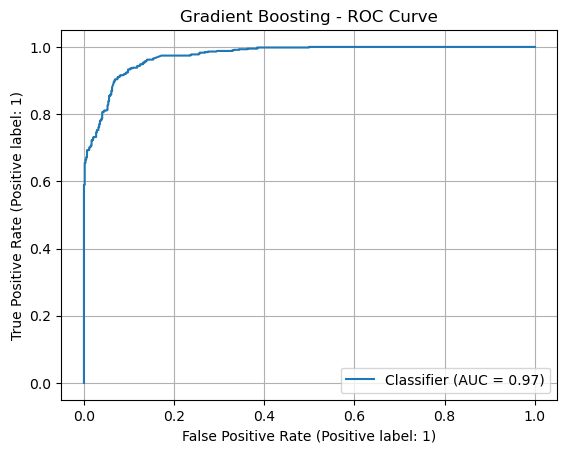

/opt/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:46:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost:
  Accuracy: 0.9966
  Precision: 0.9983
  Recall: 0.9948
  F1 Score: 0.9966
  ROC AUC: 0.9998
----------------------------------------


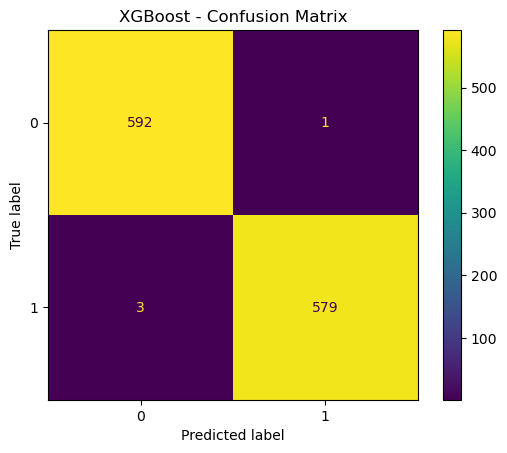

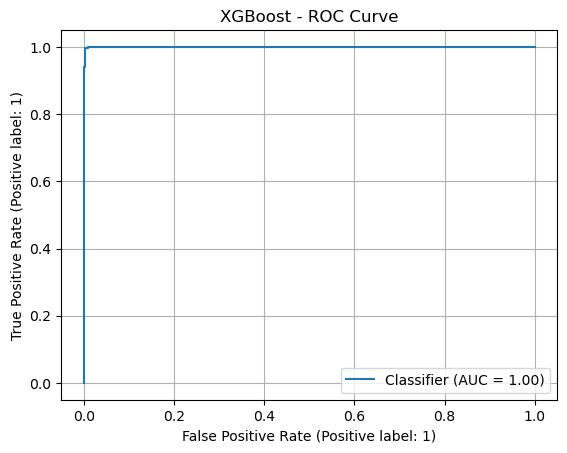

Naive Bayes:
  Accuracy: 0.5438
  Precision: 0.6438
  Recall: 0.1770
  F1 Score: 0.2776
  ROC AUC: 0.6156
----------------------------------------


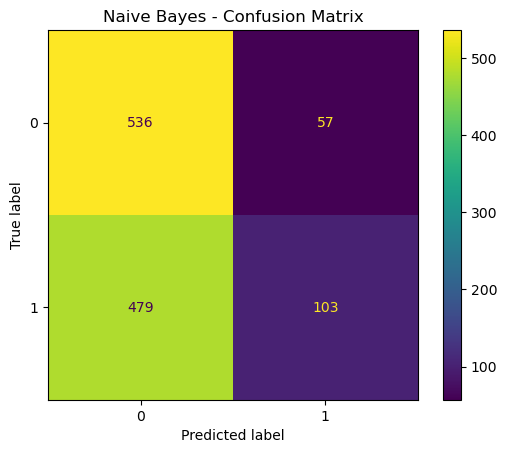

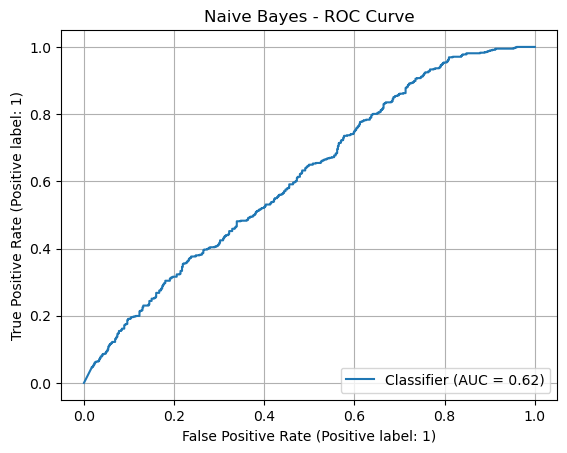

Neural Network (MLPClassifier):
  Accuracy: 0.9106
  Precision: 0.9206
  Recall: 0.8969
  F1 Score: 0.9086
  ROC AUC: 0.9668
----------------------------------------


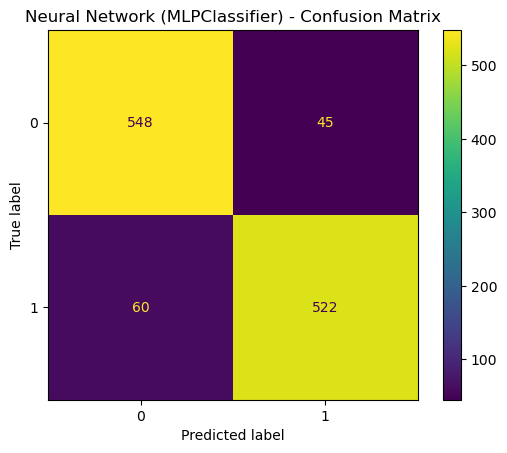

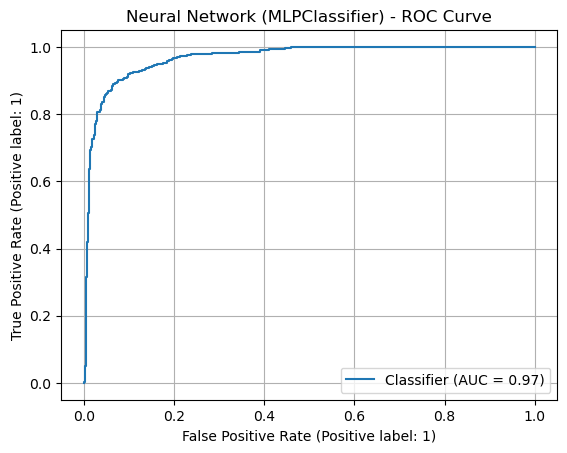

In [4]:
# 📊 Initialize lists for metrics
accuracy = []
precision = []
recall = []
f1 = []
roc_auc = []

# 🚀 Train, predict, evaluate
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else y_pred

    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))
    roc_auc.append(roc_auc_score(y_test, y_proba))

    print(f"{name}:")
    print(f"  Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"  Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"  Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"  F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"  ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
    print("-" * 40)

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f"{name} - Confusion Matrix")
    plt.grid(False)
    plt.show()

    RocCurveDisplay.from_predictions(y_test, y_proba)
    plt.title(f"{name} - ROC Curve")
    plt.grid(True)
    plt.show()


In [5]:
# 📝 Final summary table
results_df = pd.DataFrame({
    "Model": list(models.keys()),
    "Accuracy": [round(a, 4) for a in accuracy],
    "Precision": [round(p, 4) for p in precision],
    "Recall": [round(r, 4) for r in recall],
    "F1 Score": [round(f, 4) for f in f1],
    "ROC AUC": [round(r, 4) for r in roc_auc]
})

results_df.sort_values(by="F1 Score", ascending=False)


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
2,XGBoost,0.9966,0.9983,0.9948,0.9966,0.9998
1,Gradient Boosting,0.9157,0.9142,0.9158,0.9150,0.9746
4,Neural Network (MLPClassifier),0.9106,0.9206,0.8969,0.9086,0.9668
0,K-Nearest Neighbors,0.8757,0.8720,0.8780,0.8750,0.9504
3,Naive Bayes,0.5438,0.6438,0.1770,0.2776,0.6156
